In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
N = 100000
C = [2, 2]

In [52]:
def s(x, y):
    return (x**2 + y**2 + x * y) / 2

In [6]:
def sa(x, y, a):
    return (x**2 + (y - a)**2 + x * (y - a)) / 2

In [54]:
def f(x, y):
    return np.where(y <= 2, 0, y**2 / 2)

In [55]:
rng = np.random.default_rng()

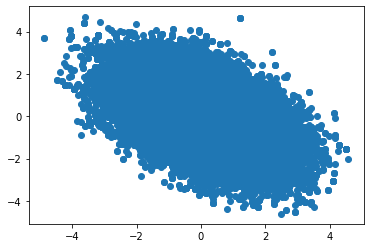

In [56]:
samples = []
update_cnt = 0
x = 0
y = 0
for _ in range(N):
    dt = (rng.random(2) - 0.5) * C * 2
    if rng.random() < np.exp(sa(x, y, 0) - sa(x + dt[0], y + dt[1], 0)):
        x = x + dt[0]
        y = y + dt[1]
        update_cnt += 1
    samples.append([x, y])
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1])

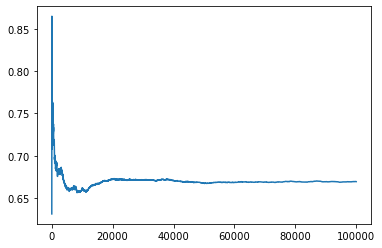

In [57]:
tmp = (np.tanh(samples[:, 0]) + 2) / 3
ave = [np.average(tmp[0:i]) for i in range(10, len(tmp))]
plt.plot(ave)

0.12605444152765324

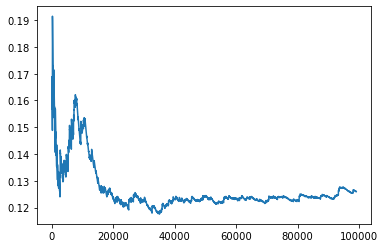

In [58]:
tmp = f(samples[:, 0], samples[:, 1])
ave = [np.average(tmp[0:i]) for i in range(1000, len(tmp))]
plt.plot(ave)
ave[-1]

-0.02085915340549791

In [10]:
jackknife_err = []
squared = samples**2
f_bar = np.average(squared)
for w in range(1, 10000):
    l = len(squared) // w
    grouped = squared[:l*w].reshape(l, w)
    each_ave = np.average(grouped, axis=1)
    jackknife_err.append(np.sqrt(((each_ave - f_bar)**2).sum() / l / (l - 1)))

ValueError: cannot reshape array of size 200000 into shape (100000,1)

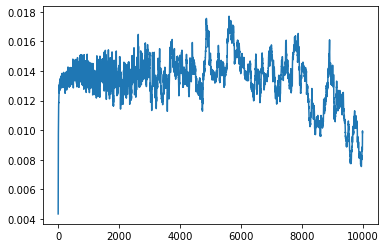

In [42]:
plt.plot(jackknife_err)

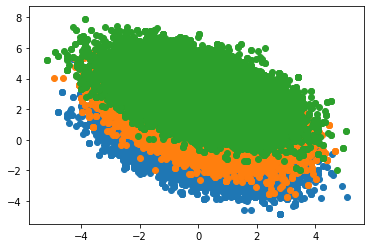

In [65]:
a_list = np.array([0, 1.5, 3])
samples = np.zeros((a_list.size, N, 2))
x = np.zeros_like(a_list)
y = np.zeros_like(a_list)

for i in range(N):
    dt = (rng.random(2) - 0.5) * C * 2
    tmp1 = sa(x, y, a_list)
    tmp2 = sa(x + dt[0], y + dt[1], a_list)
    has_update = rng.random(a_list.size) < np.exp(tmp1 - tmp2)
    x = np.where(has_update, x + dt[0], x)
    y = np.where(has_update, y + dt[1], y)
    samples[:, i, :] = np.array([x, y]).T

for sample in samples:
    plt.scatter(sample[:, 0], sample[:, 1])


In [66]:
coef = 1
for sample, a0, a1 in zip(samples[:-1, :, :], a_list[:-1], a_list[1:]):
    s_sample0 = sa(sample[:, 0], sample[:, 1], a0)
    s_sample1 = sa(sample[:, 0], sample[:, 1], a1)
    exp_sample = np.exp(s_sample0 - s_sample1)
    coef *= np.average(exp_sample)

f_sample = f(samples[-1, :, 0], samples[-1, :, 1])
s_sample0 = sa(samples[-1, :, 0], samples[-1, :, 1], a_list[-1])
s_sample1 = sa(samples[-1, :, 0], samples[-1, :, 1], a_list[0])
exp_sample = np.exp(s_sample0 - s_sample1)

result = coef * np.average(exp_sample * f_sample)
result

0.13623598366057685

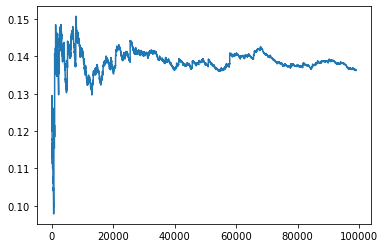

In [67]:
coef = 1
for sample, a0, a1 in zip(samples[:-1, :, :], a_list[:-1], a_list[1:]):
    s_sample0 = sa(sample[:, 0], sample[:, 1], a0)
    s_sample1 = sa(sample[:, 0], sample[:, 1], a1)
    exp_sample = np.exp(s_sample0 - s_sample1)
    coef *= np.array([np.average(exp_sample[:i]) for i in range(1000, N)])

f_sample = f(samples[-1, :, 0], samples[-1, :, 1])
s_sample0 = sa(samples[-1, :, 0], samples[-1, :, 1], a_list[-1])
s_sample1 = sa(samples[-1, :, 0], samples[-1, :, 1], a_list[0])
exp_sample = np.exp(s_sample0 - s_sample1)

result = coef * np.array([np.average(exp_sample * f_sample) for i in range(1000, N)])
plt.plot(result)